## GRADIENT DESCENT (GRADYAN İNİŞİ)

`Gradient Descent` yöntemi, birbirinden farklı problemler için optimum sonucu bulabilme yeteneğine sahip bir **eniyileme/optimizasyon** algoritmasıdır. Gradient Descent yöntemindeki anafikir, *parametreleri her iterasyonda tekrar revize ederek/ayarlayarak maliyet fonksiyonunu en aza indirmektir.*

Bununla birlite Gradient Descent yöntemi, neredeysa bütün Machine Learning algoritmaları için kullanılır ve bu algoritmaların çalışma mantığını içselleştirmek bakımından oldukça mühimdir.

***

### DATA OLUŞTURALIM

* Gradient Descent yöntemini incelemek üzere kendi örnek verimizi yaratalım.

In [1]:
# Gerekli kütüphaneleri import edelim.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# np.random modülünü kullanarak 100 adet random değişken üretiyoruz ve bu değişkenleri 2 ile çarpıyoruz.
# Böylece 0 - 2 aralığında 100 adet değer üretmiş oluyoruz.

X = 2 * np.random.rand(100 , 1)

In [3]:
# Ürettiğimiz değerleri görelim.

print(X)

[[1.44771073e+00]
 [1.29336347e+00]
 [7.92497905e-01]
 [1.96114662e+00]
 [1.43092394e-01]
 [1.83514354e+00]
 [1.82874896e+00]
 [1.14280386e+00]
 [1.17620431e+00]
 [1.26445647e+00]
 [4.41490739e-01]
 [7.89733913e-01]
 [4.01082540e-01]
 [2.28106326e-01]
 [1.08532658e+00]
 [9.56437748e-01]
 [1.55712060e+00]
 [1.81549506e+00]
 [1.45997826e+00]
 [1.96413866e+00]
 [6.73019303e-01]
 [7.52634071e-01]
 [7.22449245e-01]
 [9.91340423e-01]
 [9.80805843e-01]
 [1.74523501e+00]
 [3.36317315e-01]
 [2.70444944e-01]
 [3.13976830e-01]
 [1.94900630e-01]
 [4.08116376e-01]
 [1.47733512e-01]
 [7.99894663e-01]
 [1.35847992e+00]
 [3.36012658e-02]
 [6.03613175e-01]
 [1.23888707e-01]
 [1.94736607e+00]
 [1.63543155e+00]
 [2.03049380e-02]
 [1.73804710e+00]
 [9.48521205e-01]
 [1.68622829e+00]
 [6.66369947e-01]
 [7.94253675e-01]
 [5.35644855e-01]
 [1.75509293e+00]
 [3.52415747e-01]
 [1.20011212e+00]
 [1.05877608e+00]
 [4.80931041e-01]
 [1.14240118e+00]
 [4.29257884e-01]
 [1.37793912e+00]
 [1.11110009e+00]
 [1.419502

In [4]:
# Ürettiğimiz değer listesinin veri tipini öğrenelim.

type(X)

numpy.ndarray

***

**Normalde X ile y arasındaki ilişkiyi önceden bilemeyiz. Bunu, önceki konularda X ile y arasındaki ilişkiyi bulmak için Regresyon modelleri kullanırken öğrenmiştik. Ancak, şu anki senaryoya göre X ile y değerleri arasındaki ilişkiyi bildiğimizi farz ederek işlemlerimizi gerçekleştireceğiz.**

***

In [5]:
# X ile y değerleri arasındaki, önceden bilgisine sahip olduğumuzu varsaydığımız, ilişki.

# 4 : intercept
# 3 : coefficient of X
# np.random.rand(100, 1) : Error Term

y = 4 + 3 * X + np.random.rand(100, 1)

In [6]:
# y değerini görelim

print(y)

[[ 9.06401484]
 [ 8.06364495]
 [ 7.35672381]
 [ 9.89468455]
 [ 4.58083578]
 [10.20036758]
 [ 9.62208835]
 [ 7.44907304]
 [ 7.97361211]
 [ 7.88556325]
 [ 5.39096189]
 [ 6.61224352]
 [ 5.22730398]
 [ 4.76949368]
 [ 8.13005004]
 [ 6.92771334]
 [ 8.69645104]
 [10.0798303 ]
 [ 8.47056679]
 [10.71227115]
 [ 6.98680347]
 [ 7.18920718]
 [ 6.6636283 ]
 [ 7.63437756]
 [ 7.17369029]
 [ 9.92849963]
 [ 5.17864048]
 [ 5.38232721]
 [ 5.09677986]
 [ 4.88317539]
 [ 5.92587136]
 [ 5.1234427 ]
 [ 6.87323845]
 [ 8.76839035]
 [ 4.46332607]
 [ 6.76263761]
 [ 4.8828052 ]
 [10.20860979]
 [ 9.65026254]
 [ 4.92995067]
 [ 9.31831962]
 [ 7.42143846]
 [ 9.37185419]
 [ 6.56108411]
 [ 6.84981265]
 [ 6.00712121]
 [ 9.66560586]
 [ 6.04986817]
 [ 7.72713305]
 [ 7.95086598]
 [ 6.39155636]
 [ 8.04624706]
 [ 5.96794748]
 [ 8.72740709]
 [ 8.02444284]
 [ 8.77892348]
 [ 9.51039234]
 [ 5.82298827]
 [ 6.57640895]
 [ 9.61875006]
 [ 4.45748248]
 [ 5.26248573]
 [ 8.46265889]
 [ 6.03677801]
 [ 5.40109334]
 [ 6.39137179]
 [ 9.46556

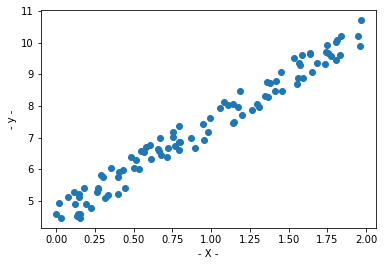

In [7]:
# X ile y arasındaki ilişkiyi görselleştirelim.

plt.scatter(X, y)
plt.xlabel("- X -")
plt.ylabel("- y -")
plt.show()

*Görüldüğü üzere X ile y arasındaki ilişki `lineer`'dir.

**X ile y arasındaki ilişkiyi bildiğimizi farz ederek yukarıdaki işlemleri gerçekleştirdik. Bu ilişkiye dair bilgi sahibi olmamızı sağlayan etken `intercept` ve `coefficient` değerlerininin tarafmızca belirlenmesidir. Böylece X ile y arasındaki ilişkiyi bildiğimiz senaryoyu gözlemleyerek regresyon modelini anımsamış olduk. Şimdi de gerçek X - y ilişkisinin fonksiyonunu yazalım.**

### $$ y = w_0 + w_1X + \epsilon $$

Burada;

* $w_0$ = $\beta_0$
* $w_1$ = $\beta_1$
* $\epsilon$ = Error Rate

* Burada $w_0$ ve $w_1$ değerleri W (weight) adlı bir matris içerisinde tutulup vektör olarak formatlanabilir.
    * W vektörü: $W = [w_0 \ w_1]$

X-y arasındaki ilişkiyi bildiğimiz senaryoyu yeniden ele alalım. Intercept ve coefficient değerlerini regresyon denkleminde yerine koyarsak aşağıdaki sonucu elde ediyorduk:<br> 
### $$y = 4 + 3 * X + np.random.rand(100,1)$$<br>

Buna göre;
#### $$w_0 = 4$$
#### $$w_1 = 3$$
olur.<br>

<br>Vektör kullanarak gösterecek olursak;
### $$y = WX + \epsilon$$
şeklinde bir sonuç elde ederiz.<br>

<br>Burada $W$ ile $X$ vektörlerinin $WX$ şeklinde gösterimi, W ile X'in *vektörel çarpımı*, `Dot Product (İç Çarpım)`'ıdır. Bu vektörel çarpım aslında; 
### $$\hat y = w_0 + w_1*x_1 + w_2*x_2 + ... + w_n*x_n + \epsilon$$
ifadesi ile eşdeğerdir.

* Yukarıda, vektörler ile yeniden yazdığımız denklemi analitik olarak çözümleyebiliriz.

**NOT:** Makine öğrenmesinde vektörler; genellikle tek sütunlu 2-boyutlu diziler şeklinde, sütun vektörü olarak gösterilir. Eğer $W$ ve $X$ sütun vektörleri ise, tahmin $\hat y = W^{T}X$ olur. Bu denklemde $W^{T}$, $W$'nin transpozudur, yani sütun vektörü yerine satır vektörüdür ve $W^{T}X$, $W^{T}$ ile $X$'in matris çarpımıdır. Elbette tahmin aynı tahmindir ancak tek bir fark söz konusudur: tahmin, artık skaler bir değer yerine tek hücreli bir matristir.

### ANALİTİK ÇÖZÜM

$y = WX + \epsilon$ denkleminin analitik çözümünü vektörler üzerinden gerçekleştirmeden önce Lineer Regresyon Yöntemi'ni kullanırken gerçekleştirdiğimiz analitik çözüm üzerinden gidelim. 

Least Squares Method (En Küçük Kareler Yöntemi), birbirine bağlı olarak değişen iki fiziksel büyüklük arasındaki ilişkiyi mümkün olduğunca gerçeğe uygun bir denklem olarak yazmak için kullanılan standart bir regresyon yöntemidir. Bir başka deyişle bu yöntem, ölçüm sonucu elde edilmiş veri noktalarına “mümkün olduğu kadar yakın” geçecek bir işlev eğrisi bulmaya yarar. Gauss-Markov Teoremi’nin en küçük kareler yöntemi, regresyon için optimal yöntemdir.

Bir diğer ifadeyle; Least Squares Method, RSS değerini minimize ederek en iyi $w_0$ ve $w_1$ değerlerini tahmin eder.

Herhangi bir $x_i$ için tahmin denklemi;
### $$ \hat y^{(i)} = \hat w_0 + \hat w_1 x^{(i)} $$

Burada;
* $x^{(i)}$: Veri setindeki $i^{inci}$ örneğin, etiketi(label) hariç tüm niteliklerinin değerlerini içeren bir vektördür.
* $\hat y^{(i)}$: Veri setindeki $i^{inci}$ örneğin etiketi, yani o örnek için istenen çıktı değeri.

<br>Genel olarak:
* **Değişkenler** için (x'in sütunları) alt index **($x_i$)** kullanılır.
* **Veriler** için (satır) üst index **($x^{(i)}$)** kullanılır

Burada **X**'ler, yani girdi değerleri, bilindiğine göre, tahmin etmeye çalıştığımız değişkenler(katsayılar/coefficients), $w_0$ ve $w_1$'dir


**NOT**: Katsayılar(Coefficients) için aşağıdaki gösterimler kullanılabilir:
* $w$
* $\theta$
* $\beta$ 

Bu noktadan itibaren gerçekleştirmek istediğimiz Tahmin için çalışmaya başlayalım.

***

Tahmin işlemini yukarıda bahsettiğimiz **Least Squares Method** ile gerçekleştiririz. Bunun yanında, Least Squares Method'un bir türü olan **Ordinary Least Squares Method**'u kullanacağız. 

<br>Ordinary Least Squares(OLS), Linear Regression modelinde bilinmeyen parametreleri tahmin etmek için kullanılan bir tür lineer Least Squares Method'dur. OLS, açıklayıcı değişkenler kümesinin doğrusal bir fonksiyonunun parametrelerini en küçük kareler ilkesine göre seçer: verilen veri kümesinde gözlemlenen bağımlı değişken (gözlemlenen değişkenin değerleri) ile bağımsız değişkenin doğrusal fonksiyonu tarafından tahmin edilenler arasındaki farkların karelerinin toplamını en aza indirir.

**Hatırlatma**
Herhangi bir **i** noktasındaki hata: $$e^{(i)} = \hat y^{(i)} - y^{(i)}$$
**<br>Herhangi Bir Noktadaki Hata Değeri = O Noktanın Tahmin Edilen Değeri - O Noktanın Gerçek Değeri** 

**e: Residual Error**

**RSS: Residual Sum of Squares**
$$RSS = e^2_1 + e^2_2 + e^2_3 +...+ e^2_n$$

**Özetle, Least Square Method, RSS değerini minimize ederek en iyi $w_0$ ve $w_1$ değerlerini tahmin eder.**

***

### MATEMATİKSEL GÖSTERİM

### $$ \hat w_1 = \frac{\sum_{i=1}^n (x^{(i)} - \overline x)(y^{(i)} - \overline y)}{\sum_{i=1}^n (x^{(i)} - \overline x)^2} $$

### $$ \hat w_0 = \overline y - \hat w_1 \overline x $$

Burada:

### $$ \overline y = \frac{1}{n} \sum_{i=1}^n y^{(i)} $$

### $$ \overline x = \frac{1}{n} \sum_{i=1}^n x^{(i)} $$

Bu noktaya kadar elde ettiğimiz bilgilerden sonra şu ifadeyi ekleyelim: çoğu zaman Analitik Yöntem kullanarak çözüme ulaşmak mümkün olmaz çünkü üzerinde çalıştığımız veriler oldukça fazladır. X, W ve y'nin aslında birer `matris` olduğunu ve X matrisinin çoğu çalışmada yüksek boyutlara sahip olduğunu göz önünde bulundurursak vardığımız bu sonuç daha anlaşılır hale gelecektir. Bununla birlikte Analitik Yöntem kullanırken, W değerlerini bulmak için çok fazla Matrix Çarpımı yapılması gerekir ki bu, bilgisayarların GPU ve CPU donanımlarını ciddi oranda yoran bir işlemdir.

Peki bu problemin üstesinden nasıl geleceğiz ya da nasıl daha etkili bir yöntem bulacağız. Cevap: YAKINSAYARAK.

**Problemin Tanımı**

Toplam Hatayı minimize edecek $w_0$ ve $w_1$ değerlerini yani katsayıları bulmak.

Toplam Hata, $w_0$ ve $w_1$ değişkenlerine bağlı bir Convex Fonksiyonudur. Bunun sebebi, Toplam Hatanın karesel değerlerin toplamı sonucunda bulunmasıdır.

<img src="images/globalminimum.png"/>

### TERİMLER

#### COST FUNCTION (MALİYET FONKSİYONU)

Lineer regresyonda **tahmin edilen y** değeri ile **gerçek y değeri** arasındaki hatayı minimuma indirebilmek için öyle **w değerleri** bulmalıyız ki Maliyet Fonksiyonu minimize edilebilsin. Maliyet Fonksiyonunun basit tanımı, gerçek y değerleri ile tahmin edilen y değerleri arasındaki fark şeklinde ifade edilebilir. Maliyet Fonksiyonu şu notasyonla gösterilir:
### $$ J(w) = \frac{1}{2n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)})^2 $$

Cost Funtion aslında MSE(Mean Square Error)'nin özel bir formudur. Hatırlatmak için:
### $$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2 $$

#### GRADIENT

Cost Function'ın değişkenlere(W değerleri) göre değişim miktarı(Türevi) 

### $$ J(w) = \frac{1}{2n} \sum_{i=1}^n (\hat w_0 + \hat w_1x^{(i)} - y^{(i)})^2 $$

$w_0$'a göre kısmi türev:

### $$ \frac{\partial J(w)}{\partial w_0} = \frac{1}{n} \sum_{i=1}^n (\hat w_0 + \hat w_1x^{(i)} - y^{(i)}) $$

### $$ \frac{\partial J(w)}{\partial w_0} = \frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) $$

$w_1$'e göre kısmi türev:

### $$ \frac{\partial J(w)}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n (\hat w_0 + \hat w_1x^{(i)} - y^{(i)}) x^{(i)} $$

### $$ \frac{\partial J(w)}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) x^{(i)} $$

Bu noktada, Cost Function(J)'ın **W** değerlerine göre nasıl değiştiğini, yani türevini, her bir $x^{(i)}$ ve $y^{(i)}$ noktasında bildiğimize göre bunu kullanabiliriz. 

**Bu türeve *Gradient* adı verilir. Kısacası Gradient, J'nin W değerlerine göre nasıl değiştiğini bize söyleyen değişim vektörüdür.**

Gradient'in W vektörü üzerinden genel gösterimi:
### $$ \frac{\partial J(W)}{\partial W_j} = \frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) X_j^{(i)} $$

<img src="images/cost_function.jpeg"/>

### Gradient Descent Nasıl Çalışır?

1. Önce bir başlangıç noktası seçilir, bu nokta herhangi bir nokta olabilir. Seçilen nokta görselde A harfi ile belirtilmiştir. [$w_0$ ve $w_1$]
2. Bu nokta için Cost Function değeri [**J(W)**] hesaplanır.
3. Hesaplanan bu maliyet - J(W) değeri üzerinden $w_0$ ve $w_1$ için **Gradient** hesaplanır. Yani W değiştiğinde J(W) ne kadar değişiyor bilgisine ulaşıyoruz.
4. Bu Gradient'in **negatif** değeri alınır. Çünkü değişim miktarı, yani türev, artış olarak gözlemlenir, ancak biz Cost Function değerini azaltmak istiyoruz. Bu nedenle değişim miktarının negatifini inceliyoruz.
5. Bu negatif değer bir learning rate **$\alpha$** ile çarpılır. Learning Rate bizim tarafımızdan belirlenir.
6. Bu çarpımın sonucu, ilgili $W$ değerinden çıkarlır
7. Döngü 1. adıma geri döner ve belirlenen iteration(döngü) adedince gerekli işlemleri yapmaya devam eder.

### Gradient Descent Akışı

Iterasyonlar kullanarak $W$ değerini güncelleyeceğiz:

### $$ W_j = W_j - \alpha (\frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) X_j^{(i)}) $$

Burada;
* **Learning Rate : $\alpha$**
* Gradient : $ \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) X_j^{(i)}) $

- Yukarıdaki işlemler sonucuna W değeri her iterasyonda yenilenir. Bunun sonucunda, Convex şekilde olan Gradient eğirisinde aşağı doğru ilerleyerek global minimuma ulaşılır.

***

## APPLIED GRADIENT DESCENT WITH PYTHON

* Maliyet (Cost) hesaplayacağımız fonksiyonumuzu yazalım.

In [8]:
# Maliyet Hesaplama Fonksiyonu

def costCalc(W, X, y):
    """
    X ve y için Cost (Maliyet) hesaplar.
    
    Parametreler:
        W = Katsayı Vektörü     -> (p, 1)
        X = Girdi Vektörü       -> (n, p)
        y = Gerçek y Değerleri  -> (n, 1)

    Burada:
        n: Toplam veri adedi (satır sayısı)
        p: X içerisindeki değişken adedi (sütun sayısı)
        
    Geriye Dönüş Değeri:
        cost = Hesaplanan maliyet değeri
    """
    
    # Toplam veri adedini hesapla
    n = len(y)
    
    # Önce tahmin değerini hesapla -> 𝑦̂ = X*W
    # X -> (n, p)
    # W -> (p, 1)
    # 𝑦̂ -> (n, 1)
    prediction = X.dot(W)
    
    # Cost Function değerini hesapla -> "J"
    cost = (1 / 2 * n) * np.sum(np.square(prediction - y))
    
    # Hesaplanan Cost Function değerini geriye dön
    return cost

In [9]:
# Gradient Descent Fonksiyonu

def gradientDescent(X, y, W, learning_rate=0.01, iterations=100):
    """
    Gradient Descent Uygulama Fonksiyonu
    
    Parametreler:
        X = X Matrisi (bias unit eklenmiş hali, yani 1'lerden oluşmuş ilk sütun)
        y = y vektörü
        W = Katsayı vektörü (w'lardan oluşmuş)
        learning_rate = learning rate: alpha (öğrenme katsayısı)
        iterations = toplam döngü sayısı
        
    Geriye Dönüş Değeri:
        * W vektörünün son hali
        * Maliyet Listesi (cost history)
        * W vektörünün listesi (weight history)
    """
    
    n = len(y)
    costHistory = np.zeros(iterations)
    weightHistory = np.zeros((iterations, 2))
    
    for itr in range(iterations):
        
        prediction = np.dot(X, W)
        
        W = W - (1 / n) * learning_rate * (X.T.dot((prediction - y)))
        
        weightHistory[itr, :] = W.T
        
        costHistory[itr] = costCalc(W, X, y)
        
    return W, costHistory, weightHistory

Şimdi de **GradientDescent()** fonksiyonunu kullanarak yukarıda yarattığımız veri seti için en uygun katsayıları bulalım.

Bunun için önce bir $W_0$ başlangıç değeri belirlememiz lazım. Bu başlangıç değeri random bir değer olabilir.

* Gaussian(Normal) Dağılım içerisinden bir rastgele W vektörü alabiliriz. https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [10]:
W = np.random.randn(2, 1)
print(W)

[[1.18010394]
 [0.70854974]]


Şimdi bir *Learning Rate($\alpha$)* değeri belirleyelim. Başlangıç için *0.01* değerini uygun bulduk.

In [11]:
learningRate = 0.01

Toplam *iteration* adedini 1000 olarak kabul edelim.

In [12]:
nIter = 1000

Elimizdeki X vektörünün tek sütunluk bir vektör olduğunu hatırlatalım. Bununla birlikte $w_0$ için 1'lerden oluşan bir sütunu (*Bias Column*) sütunların başına eklemek durumundayız.

In [13]:
X

array([[1.44771073e+00],
       [1.29336347e+00],
       [7.92497905e-01],
       [1.96114662e+00],
       [1.43092394e-01],
       [1.83514354e+00],
       [1.82874896e+00],
       [1.14280386e+00],
       [1.17620431e+00],
       [1.26445647e+00],
       [4.41490739e-01],
       [7.89733913e-01],
       [4.01082540e-01],
       [2.28106326e-01],
       [1.08532658e+00],
       [9.56437748e-01],
       [1.55712060e+00],
       [1.81549506e+00],
       [1.45997826e+00],
       [1.96413866e+00],
       [6.73019303e-01],
       [7.52634071e-01],
       [7.22449245e-01],
       [9.91340423e-01],
       [9.80805843e-01],
       [1.74523501e+00],
       [3.36317315e-01],
       [2.70444944e-01],
       [3.13976830e-01],
       [1.94900630e-01],
       [4.08116376e-01],
       [1.47733512e-01],
       [7.99894663e-01],
       [1.35847992e+00],
       [3.36012658e-02],
       [6.03613175e-01],
       [1.23888707e-01],
       [1.94736607e+00],
       [1.63543155e+00],
       [2.03049380e-02],


In [14]:
n = len(X)

X_b = np.c_[np.ones((n, 1)), X]

print(X_b)

[[1.00000000e+00 1.44771073e+00]
 [1.00000000e+00 1.29336347e+00]
 [1.00000000e+00 7.92497905e-01]
 [1.00000000e+00 1.96114662e+00]
 [1.00000000e+00 1.43092394e-01]
 [1.00000000e+00 1.83514354e+00]
 [1.00000000e+00 1.82874896e+00]
 [1.00000000e+00 1.14280386e+00]
 [1.00000000e+00 1.17620431e+00]
 [1.00000000e+00 1.26445647e+00]
 [1.00000000e+00 4.41490739e-01]
 [1.00000000e+00 7.89733913e-01]
 [1.00000000e+00 4.01082540e-01]
 [1.00000000e+00 2.28106326e-01]
 [1.00000000e+00 1.08532658e+00]
 [1.00000000e+00 9.56437748e-01]
 [1.00000000e+00 1.55712060e+00]
 [1.00000000e+00 1.81549506e+00]
 [1.00000000e+00 1.45997826e+00]
 [1.00000000e+00 1.96413866e+00]
 [1.00000000e+00 6.73019303e-01]
 [1.00000000e+00 7.52634071e-01]
 [1.00000000e+00 7.22449245e-01]
 [1.00000000e+00 9.91340423e-01]
 [1.00000000e+00 9.80805843e-01]
 [1.00000000e+00 1.74523501e+00]
 [1.00000000e+00 3.36317315e-01]
 [1.00000000e+00 2.70444944e-01]
 [1.00000000e+00 3.13976830e-01]
 [1.00000000e+00 1.94900630e-01]
 [1.000000

Bu noktada *gradientDescent* fonksiyonunu çağırabiliriz.

In [15]:
finalW, costHistory, weightHistory = gradientDescent(X_b, y, W, learningRate, nIter)

In [16]:
print("W-Final: ", finalW)

W-Final:  [[4.43252807]
 [3.03496437]]


In [17]:
print("Cost History:", costHistory)

Cost History: [150532.00895113 144504.26024886 138719.9273815  133169.17617145
 127842.56976387 122731.05257393 117825.93488262 113118.87805487
 108601.88035492 104267.26333486 100107.65877296  96115.99613984
  92285.490571    88609.63132527  85082.17070958  81697.11345121
  78448.7064994   75331.42923903  72339.98409965  69469.28754396
  66714.46142036  64070.82466492  61533.88533851  59099.33298577
  56763.03130272  54521.01110063  52369.46355416  50304.73372234
  48323.31433123  46421.83980789  44597.08055526  42845.93745846
  41165.43661298  39552.7242659   38005.06196149  36519.82188293
  35094.48238222  33726.62369073  32413.92380306  31154.1545271
  29945.17769385  28784.94152022  27671.47711883  26602.89514888
  25577.38260222  24593.1997194   23648.67703019  22742.21251378
  21872.26887365  21037.37092255  20236.10307314  19467.10693005
  18729.07897916  18020.76837026  17340.97478935  16688.54641682
  16062.3779682   15461.408814    14884.62117557  14331.03839382
  13799.7232

In [18]:
print("Initial Cost:", costHistory[0])
print("Final Cost:", costHistory[-1])

Initial Cost: 150532.00895112593
Final Cost: 489.0071251479155


In [19]:
W_0 = W[0]
print("W_0:", W_0)

finalW_0 = finalW[0]
print("Final W_0:", finalW_0)

W_0: [1.18010394]
Final W_0: [4.43252807]


In [20]:
W_1 = W[1]
print("W_1:", W_1)

finalW_1 = finalW[1]
print("Final W_1:", finalW_1)

W_1: [0.70854974]
Final W_1: [3.03496437]


Gerçek katsayıları hatırlayalım;
* $w_0$ = 4
* $w_1$ = 3

*Gradient Descent* ile bulduğumuz katsayılar;

In [21]:
print("𝑤̂_0:", finalW_0)
print("𝑤̂_1:", finalW_1)

𝑤̂_0: [4.43252807]
𝑤̂_1: [3.03496437]


* Görüldüğü üzere gerçek değerler ve Gradient Descent ile elde edilen değerler birbirlerine oldukça yakın.

***

### LEARNING RATE

* Şimdi de maliyet değerinin her iterasyonda nasıl değiştiğini inceleyelim.

In [22]:
# Maliyet değişimi görselleştiren fonksiyon

def costVsIterations(costHistory, nIter):
    
    fig, ax = plt.subplots(figsize=(12,8))
    
    plt.plot(range(nIter), costHistory)
    
    plt.xlabel("Iterations")
    plt.ylabel("Cost - J(W)")
    plt.title("MALİYET - ITERASYON")
    plt.grid()
    plt.show()

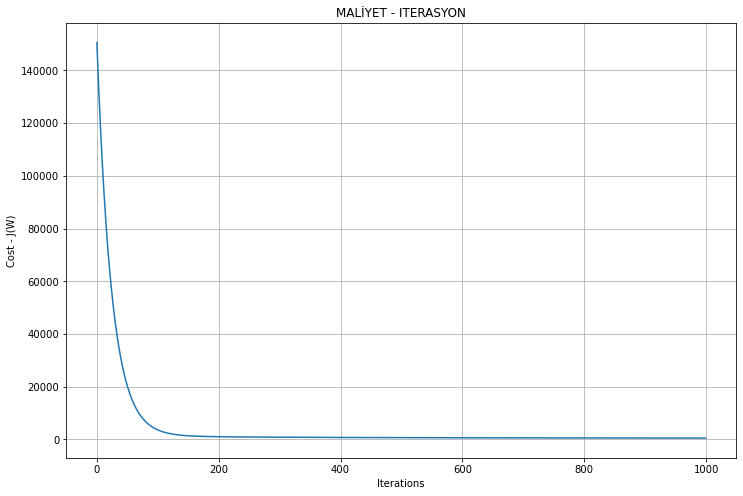

In [23]:
costVsIterations(costHistory, nIter)

Grafiğe göre, *iterasyon sayısı arttıkça*;
* Öncelikle, *Cost* değeri çok hızlı bir şekilde azalıyor.
* Belli bir iterasyon sayısından sonra (yaklaşık 180. iterasyon) *Cost* değerinin azalama ivmesi oldukça düşüyor.

**DİKKAT: Yukarıda elde ettiğimiz sonucu Learning Rate($\alpha$) = 0.01 için elde ettik.** 

In [24]:
def callGradient(learningRate, nIter):
    
    # Belirtilen learningRate ve nIter için maliyet değerlerini al
    finalW, costHistory, weightHistory = gradientDescent(X_b, y, W, learningRate, nIter)
    
    # Bu maliyet değerlerine göre grafik çizimi yap
    costVsIterations(costHistory, nIter)

**DENEY - 1**: *Learning Rate($\alpha$)* = 0.01 olacak şekilde aynı kalsın ancak *İterasyon* sayısını 1000'den 2000'e çıkaralım.

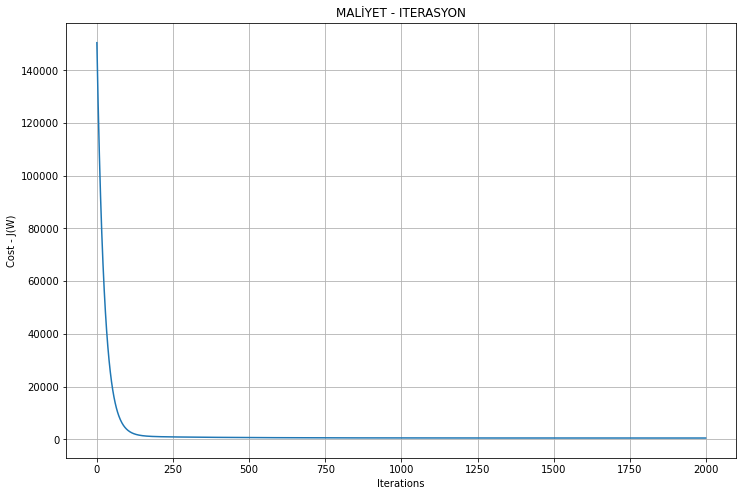

In [25]:
# learningRate = 0.01
# nIter = 2000

learningRate = 0.01
nIter = 2000
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere bir önceki çalışmaya göre hiçbir değişiklik gerçekleşmedi çünkü zaten 180. iterasyon civarında en iyi değer bulunmuş oluyordu.

**DENEY - 2**: *Learning Rate($\alpha$)* = 0.01 olacak şekilde aynı kalsın ancak *İterasyon* sayısını 1000'den 500'e düşürelim.

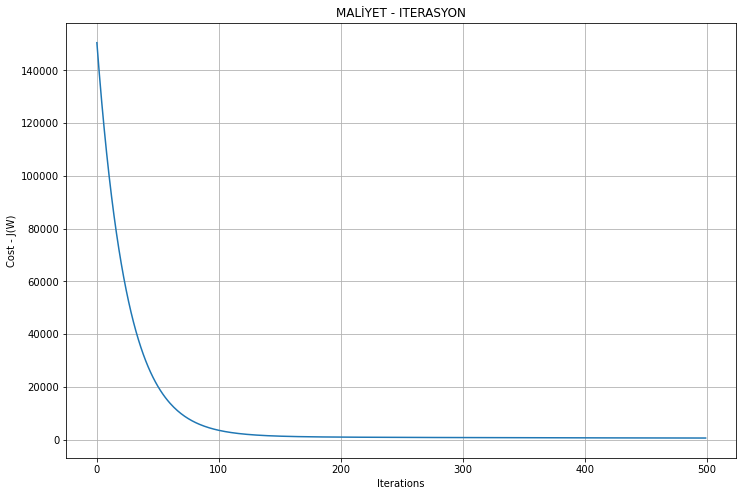

In [26]:
# learningRate = 0.01
# nIter = 500

learningRate = 0.01
nIter = 500
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere bir önceki çalışmaya göre hiçbir değişiklik gerçekleşmedi çünkü zaten 180. iterasyon civarında en iyi değer bulunmuş oluyordu.

**DENEY - 3**: *Learning Rate($\alpha$)* = 0.05 olacak şekilde arttırılsın ancak *İterasyon* sayısı 1000 olacak şekilde aynı kalsın.

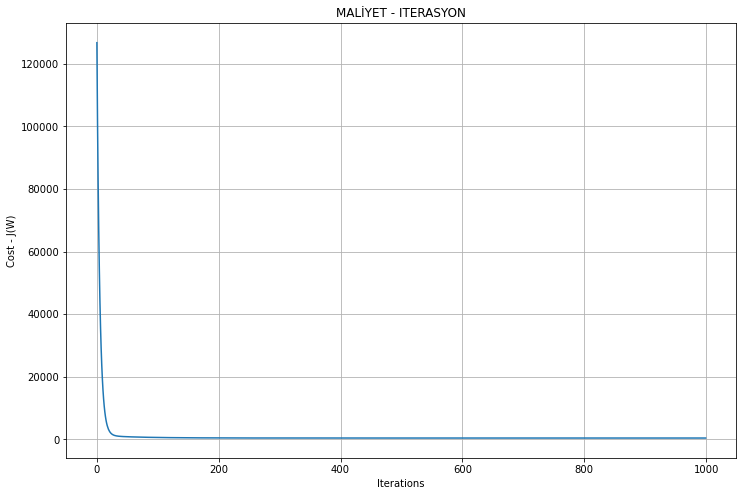

In [27]:
# learningRate = 0.05
# nIter = 1000

learningRate = 0.05
nIter = 1000
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere bu senaryoda optimum değere çok hızlı bir şekilde ulaşıldı ki bu takribi 40. *iterasyona* denk düşüyor.

O halde, *Learning Rate* değerini adım büyüklüğü olarak düşünebilir ve adımlar ne kadar büyük olursa optimum sonuca o kadar çabuk ulaşırız diyebiliriz.

**ACABA DİYEBİLİR MİYİZ?**

**Deney - 4**: *İterasyon* sayısı 1000 olacak şekilde aynı kalsın ancak *Learning Rate($\alpha$)* değerini **0.1** olacak şekilde ayarlayalım. 

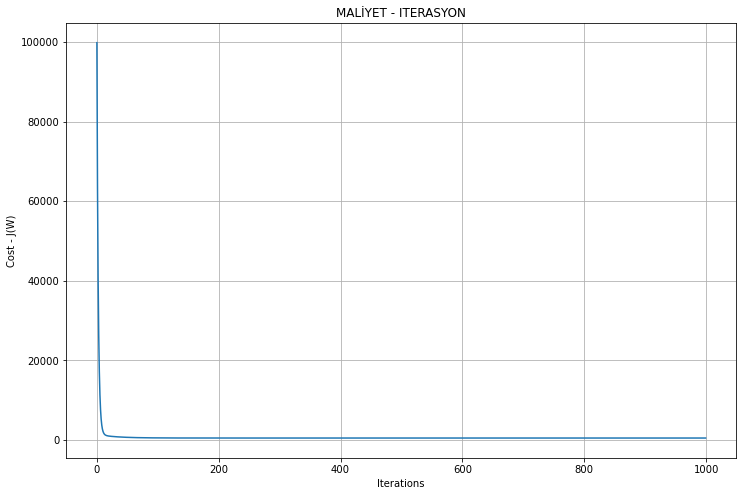

In [28]:
# learningRate = 0.1
# nIter = 1000

learningRate = 0.1
nIter = 1000
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere, *Learning Rate($\alpha$)* değerini biraz daha arttırınca optimum sonuca daha hızlı ulaştık ki bu da takribi 20. iterasyona denk düşüyor.

**Peki *Learning Rate($\alpha$)* değerini biraz daha arttırırsak yine hızlı bir şekilde optimum sonuca ulaşabilir miyiz? Deneyelim :)**

**Deney - 5**: *İterasyon* sayısı 1000 olacak şekilde aynı kalsın ancak *Learning Rate($\alpha$)* değerini **1.0** olacak şekilde ayarlayalım. 

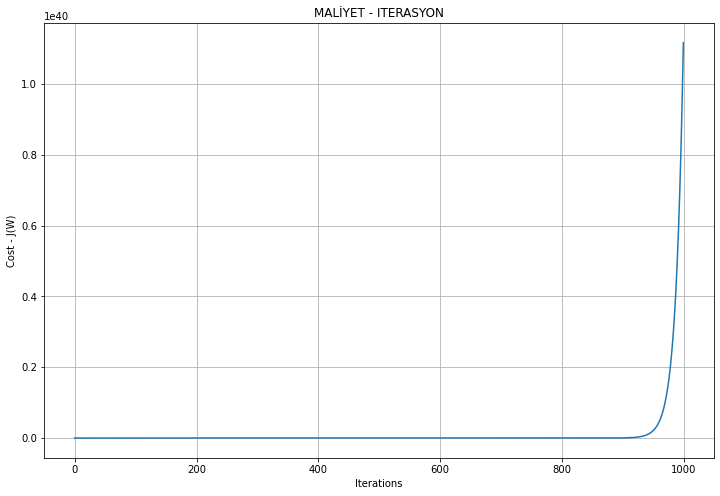

In [29]:
# learningRate = 1
# nIter = 1000

learningRate = 1
nIter = 1000
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere bu noktada bırakın en iyi değeri bulayı, maliyet değeri belli bir noktadan itibaren çok hızlı bir şekilde arttı.

**Peki neden böyle bir sonuç aldık?** Çünkü *Overshoot* yaptık yani çok büyük boyutlu bir *Learning Rate($\alpha$)* belirleyerek ulaşmayı planladığımız en iyi noktayı atladık, çünkü adım büyüklüğümüz çok fazlaydı.

<img src='images/overshoot.jpg' />

**Soru**: Öyleyse, çok küçük *Learning Rate($\alpha$)* değerlerinde nasıl bir sonuçla karşılaşacağız? Şimdi de bu durumu inceleyelim.

**Deney - 6**: *İterasyon* sayısını 1000 olacak şekilde aynı değerde tutalım ancak *Learning Rate($\alpha$)* değerini **0.001** olacak şekilde küçültelim.

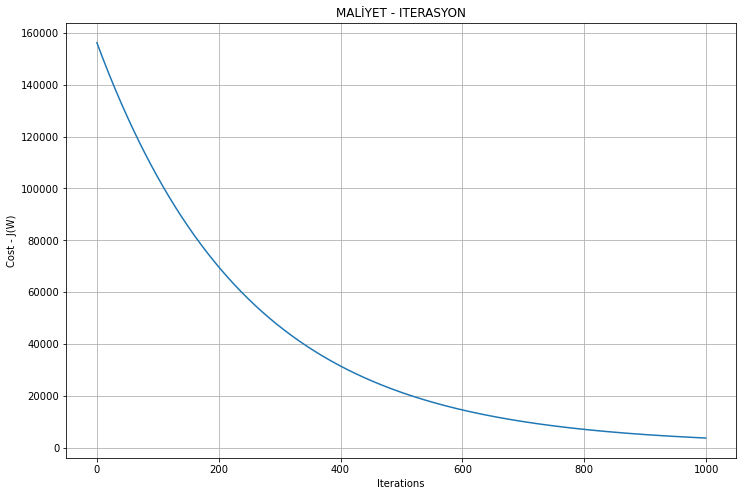

In [30]:
# learningRate = 0.001
# nIter = 1000

learningRate = 0.001
nIter = 1000
callGradient(learningRate, nIter)

**Sonuç**: Fena değil, 1000. iterasyona yakın bir noktada minimum değere yaklaştık.

* Learning Rate($\alpha$) değerini biraz daha küçültelim ve sonuçları inceleyelim.

**Deney - 7**: *İterasyon* sayısını 1000 olacak şekilde aynı değerde tutalım ancak *Learning Rate($\alpha$)* değerini **0.0001** olacak şekilde küçültelim.

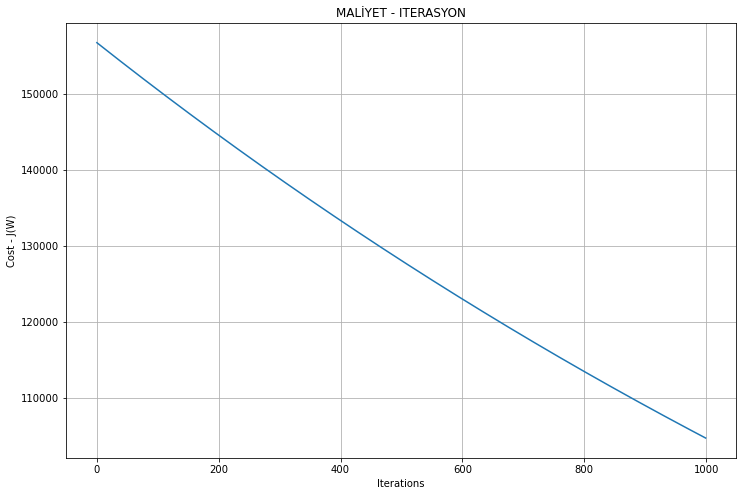

In [31]:
# learningRate = 0.0001
# nIter = 1000

learningRate = 0.0001
nIter = 1000
callGradient(learningRate, nIter)

**Sonuç**: Oldukça kötü, çünkü *Final Cost* değerine yaklaşılamadı bile. Bu noktada, yani *Learning Rate* değerinin oldukça düşük olduğu durumda *İterasyon* sayısını arttırmamız gerekiyor.

**Deney - 8**: *İterasyon* sayısını 10.000 olacak şekilde arttıralım ve *Learning Rate* değerini **0.0001** olacak şekilde aynı tutalım.

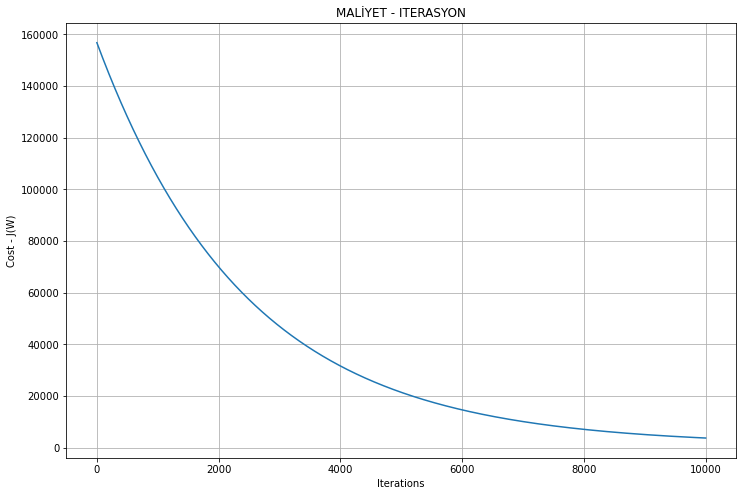

In [32]:
# learningRate = 0.0001
# nIter = 10000

learningRate = 0.0001
nIter = 10000
callGradient(learningRate, nIter)

**Sonuç**: *Learning Rate* değerinin düşük olduğu noktada *İterasyon* değerini arttırmak, minimum maliyet değerine ulaşmak bakımından işe yarar bir yöntem. Görüldüğü üzere eğiri **Final Cost** değerine yaklaştı.

***

### ÇIKARIM
* *Learning Rate($\alpha$)* değeri çok büyük olursa *Overshoot* gerçekleşir ve asla minimum maliyet değerine ulaşamayız.
* *Learning Rate($\alpha$)* değeri çok küçük olursa, o zaman da adımlarımız çok küçük olacağı için Optimum Cost değerine yaklaşmamız çok uzun sürer, yani çok fazla iterasyon gerçekleştirmemiz gerekir.


- Peki Optimum Learning Rate değerini nasıl kararlaştıracağız? Bunu tam manasıyla bilmek pek de mümkün değil ancak çözüm sağlayan bazı algoritmalar mevcuttur. **Adam Optimizer** algoritması bunlardan biridir ve *Learning Rate* değerini başlangıçta biraz büyük olarak belirleyip giderek küçültmek yöntemini kullanır.


* İncelemek için: https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent

***

## STOCHASTIC GRADIENT DESCENT (SGD)

Gradient Descent yönteminin ana sorunu her adımda tüm eğitim veri setini kullanmasıdır. Bu durum da eğitim veri setinin büyük olduğu senaryolarda algoritmanın yavaşlamasına sebep olur. Diğer taraftan *Stochastic Gradient Descent* yöntemi her adımda eğitim veri setinden rastgele bir *örnek* seçer ve *Gradient* değerini sadece o örnek için hesaplar. Doğal olarak her seferinde bir örnek üzerinde çalışmak her *iterasyonda* çok az veri işlemi gerektireceğinden algoritma çok daha hızlı çalışır. Bu yöntem, her iterasyonda bellekte sadece bir örnek bulunması gerektiğinden, aynı zamanda çok büyük veri setleriyle çalışmayı mümkün hale getirir.

Diğer yandan *Stochastic* yani *Rastgelelik* yapısı nedeniyle bu algoritma, *Gradient Descent* algoritmasından daha az düzenlidir, yani tabiri caiz ise minimum maliyet değerine ulaşana kadar eğri üzerinden uysalca inmek yerine bir sağa bir sola zıplar durur ve ortalama bir iniş gerçekleştirir. Zamana bağlı olarak minimum maliyet değerine çok yaklaşacaktır ama o noktaya vardığında bile etrafta gezinmeye devam edecektir ve asla sakinleşmeyecektir.

Sonuç olarak algoritma işlemlerini tamamladığında son parametre değerleri iyi olacaktır ama optimum olmayacaktır.

In [33]:
# Stochastic Gradient Descent Fonksiyonu

def stochasticGradientDescent(X, y, W, learningRate=0.01, iterations=100):
    """
    Stochastic Gradient Descent uygulama fonksiyonu.
    
    Parametreler:
        X = X Matrisi (bias unit eklenmiş hali, yani 1'lerden oluşmuş ilk sütun)
        y = y vektörü
        W = Katsayı vektörü (w'lardan oluşmuş)
        learning_rate = learning rate: alpha (öğrenme katsayısı)
        iterations = toplam döngü sayısı
    
    Dönüş:
        * W vektörünün son hali
        * Maliyet Listesi (cost history)
        * W vektörünün listesi (weight history)
    """
    
    n = len(y)
    costHistory = np.zeros(iterations)
    
    for itr in range(iterations):
        cost = 0
        
        # Her seferinde rastgele bir X_i değeri seçip maliyet değeri hesaplayacağız.
        for i in range(n):
            # Rastgele bir değer al
            rantInt = np.random.randint(0, n)
            
            X_i = X[rantInt, :].reshape(1, X.shape[1])
            y_i = y[rantInt].reshape(1, 1)
            
            # Tek X_i için tahmin
            prediction = np.dot(X_i, W)
            
            # Tek X_i için katsayı değişimi
            W = W - (1 / n) * learningRate * (X_i.T.dot((prediction - y_i)))
            
            # Tek X_i için hesaplanan cost'u cost değişkenine ekle
            cost = costCalc(W, X_i, y_i)
            
        # Bu iterasyon için cost değerini costHistory'e ekle
        costHistory[itr] = cost
        
    return W, costHistory

* Yukarıdaki fonksiyon her iterasyonda, X'ler üzerinde rastgele yöntemle dönüp maliyet değerlerini topladı. Bu şekilde bir nebze de olsa iyileşme sağladık ancak hala bir sorunumuz var: X'ler üzerinde teker teker döndük, yani her seferinde maliyet değerini hesaplarken bir X satırı aldık(X_i). Gerçek hayatta bu yöntem pek tercih edilmez çünkü büyük boyutlu verilerde çok zaman kaybına sebep olur.
* Bu sorunun çözümü ise X'leri teker teker değil, parti parti almak(Batch). Bu yönteme de *Mini-Batch Stochastic Gradient Descent* denir.

## MINI-BATC GRADIENT DESCENT

In [34]:
# Mini-Batch Stochastic Gradient Descent Fonksiyonu
def minibatchStochasticGradientDescent(X, y, W, learningRate=0.01, iterations=100, batchSize=20):
    """
    Stochastic Gradient Descent uygulama fonksiyonu.
    
    Parametreler:
        X = X Matrisi (bias unit eklenmiş hali, yani 1'lerden oluşmuş ilk sütun)
        y = y vektörü
        W = Katsayı vektörü (w'lardan oluşmuş)
        learning_rate = learning rate: alpha (öğrenme katsayısı)
        iterations = toplam döngü sayısı
    
    Dönüş:
        * W vektörünün son hali
        * Maliyet Listesi (cost history)
        * W vektörünün listesi (weight history)
    """
    
    n = len(y)
    costHistory = np.zeros(iterations)
    
    # Toplam kaç adet batch olacak?
    nBatches = int(n / batchSize)
    
    for itr in range(iterations):
        cost = 0
        
        # X ve y'leri karıştır, veri sıraları rastgele olsun
        indices = np.random.permutation(n)
        X = X[indices]
        y = y[indices]
        
        # Her seferinde rastgele bir X_i partisi alıp maliyet değeri hesaplayacağız.
        for i in range(0, n, batchSize):
            # Rastgele X_i ve y_i partileri
            X_i = X[i:i+batchSize]
            y_i = y[i:i+batchSize]
        
            # Bias column ekle (1'ler sütunu)
            x_i = np.c_[np.ones(len(X_i)), X_i]
        
            # X_i partisi için tahmin
            prediction = np.dot(X_i, W)

            # X_i partisi için katsayı değişimi
            W = W - (1/n) * learningRate * (X_i.T.dot((prediction - y_i)))

            # X_i partisi için hesaplanan cost'u cost değişkenine ekle
            cost += costCalc(W, X_i, y_i)
        
        # bu iterasyon için cost değerini cost_history'ye ekle
        costHistory[itr] = cost
    
    return W, costHistory